# 8.1 Centering Predictors

As we mentioned many times before, it is important to always look at your data! So before we begin with the analysis, lets get a better understanding of the data. For convenience, we create a smaller subset of the main DataFrame:

*Additional information: When creating new DataFrames derived from others, they are by default a view or a shallow copy of the original DataFrame. This is due to Pandas optimizing memory usage and access. However, when a shallow copy is created, the data may not be completely decoupled. Only the structure (index and column information) is copied, but the data itself may still reference the original. Sometimes it can therefore be helpful to make a deep copy, which creates an entirely independent object by using the `.copy()` method.*

In [1]:
import pandas as pd

df = pd.read_csv("data/data.txt", delimiter='\t')
df_small = df[['age', 'subject', 'WMf', 'gff']].copy() # Create a deep copy

## Descriptive Analysis

We'll start by examining the first few rows of our new subset using `head()` and then apply `describe()` to get an overview of key statistics, such as the mean and standard deviation.

In [2]:
print(df_small.head())
print(df_small.describe())

   age  subject       WMf     gff
0   29   111000  0.707143  0.3750
1   23   111001  0.846429  0.3750
2   24   111002  0.744048  0.3125
3   33   111003  0.857143  0.3125
4   29   111004  0.871429  0.4375
              age        subject         WMf         gff
count  255.000000     255.000000  255.000000  255.000000
mean    27.368627  271403.650980    0.819362    0.435049
std      4.890674  304680.774051    0.102989    0.175362
min     18.000000  111000.000000    0.530301    0.000000
25%     23.000000  121112.000000    0.764881    0.312500
50%     28.000000  131220.000000    0.830952    0.437500
75%     31.000000  162811.500000    0.895238    0.562500
max     35.000000  952134.000000    1.000000    0.937500


To further visualize the data, we can use Seaborn's histplot to examine the frequency distribution of the age variable. This will give us a clearer view of how age is distributed across our sample.

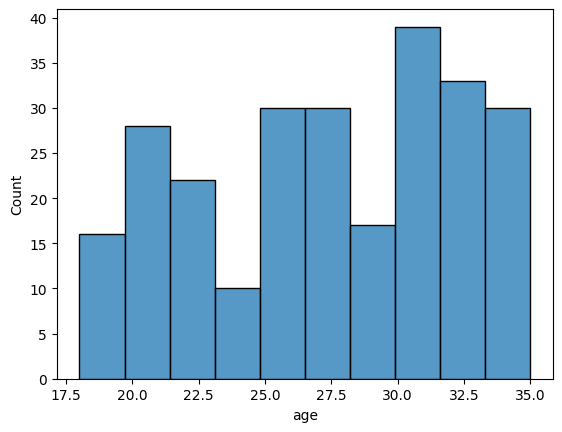

In [3]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_small['age'], bins=10);

By using Seaborn's 'scatterplot', we can explore the relationship between `WMf` and `gff` and identify any trends. Additionally, we will incorporate age as the hue to visualize how this variable may influence the relationship between `WMf` and `gff`.

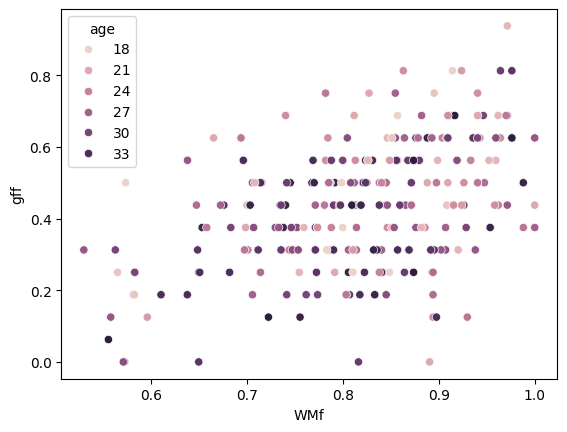

In [4]:
sns.scatterplot(data=df_small, x='WMf', y='gff', hue='age');

## Centering the Predictors

As discussed in the lecture, it is common practice to center predictors in multiple regression around their mean to obtain a meaningful intercept $b_0$. We can do this by subtracting the mean of each variable from their raw values. We will then save the centered variables to new columns:

In [5]:
df_small['age_c'] = df_small['age'] - df_small['age'].mean()
df_small['WMf_c'] = df_small['WMf'] - df_small['WMf'].mean()

print(df_small.head())

   age  subject       WMf     gff     age_c     WMf_c
0   29   111000  0.707143  0.3750  1.631373 -0.112219
1   23   111001  0.846429  0.3750 -4.368627  0.027066
2   24   111002  0.744048  0.3125 -3.368627 -0.075315
3   33   111003  0.857143  0.3125  5.631373  0.037781
4   29   111004  0.871429  0.4375  1.631373  0.052066


We can now proceed with the actual analysis. To compare multiple linear regression models with centered and non-centered predictors, we can use `ols()` from Statsmodels and plot the results with the different variables. Let's create two identical models, one with non-centered predictors, and one with centered ones:

In [6]:
import statsmodels.formula.api as smf

results = smf.ols(formula='gff ~ WMf + age', data=df_small).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gff   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     39.75
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           9.89e-16
Time:                        08:53:09   Log-Likelihood:                 117.56
No. Observations:                 255   AIC:                            -229.1
Df Residuals:                     252   BIC:                            -218.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0268      0.102     -0.263      0.7

In [7]:
results = smf.ols(formula='gff ~ WMf_c + age_c', data=df_small).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gff   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     39.75
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           9.89e-16
Time:                        08:53:09   Log-Likelihood:                 117.56
No. Observations:                 255   AIC:                            -229.1
Df Residuals:                     252   BIC:                            -218.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4350      0.010     45.258      0.0

**What's the difference?**

- In the centered model, the intercept can now be interpreted as the expected fluid intelligence at
  1. the average level of figural working memory
  2. the average age of the range considered in the study.

- Centering has **no** influence on the regression slope coefficients (for `WMf` and `age`).
- Centering has **no** influence on the explained variance $(R^2)$.